In [2]:
import os
import pandas as pd

DATA_PATH = '../../backend/data/database/'

In [3]:
participants_df = pd.read_parquet(os.path.join(DATA_PATH, 'participants.parquet'))
participants_df.shape

(21, 8)

In [4]:
participants_df.sample(10)

,ParticipantId,TreatmentGroup,PoliticalLeaning,Tweet1,Tweet2,Tweet3,Tweet4,ParticipantStatus
12,63a80db055cc11efbda2803f,placebo,3,R075,L088,R082,L074,finished
17,asdkaskdhjk12312312,machine,4,R042,L052,L046,R048,finished
16,63a811e855cc11efbda2803f,placebo,4,R066,R085,L063,L060,finished
3,63a80aae55cc11efbda2803f,machine,6,R062,L053,R051,L028,finished
5,63a80b6c55cc11efbda2803f,machine,4,R036,L055,R043,L041,finished
6,63a80bb255cc11efbda2803f,machine,4,R049,L044,L033,R047,finished
0,63a8082455cc11efbda2803f,human,1,L008,R009,L006,R026,finished
15,63a80f0e55cc11efbda2803f,machine,4,R054,R057,L039,L040,finished
8,63a80c4855cc11efbda2803f,placebo,5,L076,R080,R072,L089,finished
10,63a80cf255cc11efbda2803f,placebo,5,R087,R067,L078,L084,finished


<Axes: xlabel='PoliticalLeaning'>

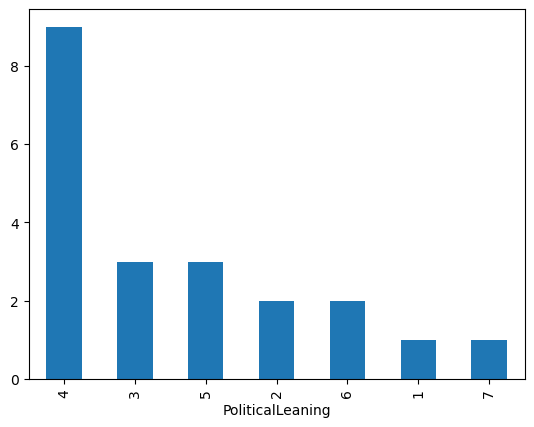

In [5]:
participants_df['PoliticalLeaning'].value_counts().plot.bar()

<Axes: xlabel='TreatmentGroup'>

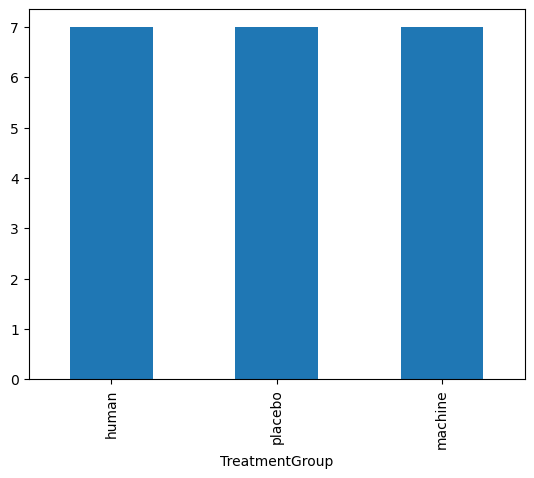

In [6]:
participants_df['TreatmentGroup'].value_counts().plot.bar()

In [7]:
answers_df = pd.read_parquet(os.path.join(DATA_PATH, 'answers.parquet'))
answers_df.shape

(84, 10)

In [8]:
answers_df.sample(10)

,AnswerId,FK_ParticipantId,FK_SessionId,Text1,Text2,AnswerQ1,AnswerQ2,AnswerQ3,AnswerQ4,TimeSpent
79,TestingLoadingP2T4,TestingLoadingP2,TestingLoadingS2,PR069,R069,5,5,5,3,6
62,63a80f0e55cc11efbda2803fT3,63a80f0e55cc11efbda2803f,63a80f3655cc11efbda2803f,L039,ML039,5,3,4,1,10
56,63a80e4655cc11efbda2803fT1,63a80e4655cc11efbda2803f,63a80e7855cc11efbda2803f,L014,HL014,4,2,4,1,344
51,63a80db055cc11efbda2803fT4,63a80db055cc11efbda2803f,63a80dd855cc11efbda2803f,PL074,L074,2,4,4,2,11
3,63a8082455cc11efbda2803fT4,63a8082455cc11efbda2803f,63a8091455cc11efbda2803f,HR026,R026,1,1,1,1,82
7,63a8097855cc11efbda2803fT4,63a8097855cc11efbda2803f,63a809b455cc11efbda2803f,HL020,L020,2,5,4,2,58
59,63a80e4655cc11efbda2803fT4,63a80e4655cc11efbda2803f,63a80e7855cc11efbda2803f,R005,HR005,4,3,4,4,80
68,asdkaskdhjk12312312T1,asdkaskdhjk12312312,asdaskjdk1231231,MR042,R042,5,5,4,3,6
48,63a80db055cc11efbda2803fT1,63a80db055cc11efbda2803f,63a80dd855cc11efbda2803f,PR075,R075,2,4,5,2,500
5,63a8097855cc11efbda2803fT2,63a8097855cc11efbda2803f,63a809b455cc11efbda2803f,HR025,R025,2,5,4,1,714


In [28]:
def check_most_pol_tweet(value):
    value_ = value
    if (value == 3 or value == 4):
        value_ = 0
    return value_


def get_participant_leaning(id):
    leaning = participants_df.loc[participants_df['ParticipantId']==id]['PoliticalLeaning']
    return leaning.values[0]

In [29]:
get_participant_leaning('TestingLoadingP2')

3

In [30]:
records = {
    'tweet_id' : [],
    'tweet_bias' : [],
    'treatment' : [],
    'treated_' : [],
    'participant_bias' : []
}

for idx, row in answers_df.iterrows():
    text1 = row['Text1']
    text2 = row['Text2']

L008
R009
HL006
HR026
HR029
HR025
L012
HL020
PR086
PR065
PL059
PL061
MR062
L053
MR051
L028
R013
R015
L002
HL017
MR036
L055
MR043
L041
R049
ML044
ML033
R047
HL007
R003
R024
L022
L076
PR080
PR072
L089
R056
ML035
R034
ML031
PR087
PR067
PL078
PL084
L016
HR030
HL004
R023
PR075
PL088
PR082
PL074
HL018
L001
HR019
HR011
L014
R027
L010
R005
R054
R057
L039
ML040
R066
PR085
L063
PL060
MR042
L052
L046
R048
R077
L083
R071
L081
R064
PL073
L070
PR069
MR058
L032
L045
R038
